#**TUGAS AKHIR DATA SCIENCE GSB**
YULISKA NUR HANIF

**STUDENT PERFORMANCE ANALYSIS**

Student performance atau performa akademik dari siswa adalah salah satu indikator penting yang digunakan untuk menilai keberhasilan proses pendidikan. Capaian akademik dari siswa dipengaruhi oleh berbagai faktor, baik dari luas maupun diri siswa itu sendiri, di antaranya adalah kondisi pembelajaran, kondisi lingkungan, hingga motivasi dan kesadaran dari siswa itu sendiri. Oleh karena itu, dilakukan analisis mengenai faktor-faktor yang mempengaruhi performa akademik siswa agar dapat digunakan sebagai bahan evaluasi dalam rangka peningkatan kualitas pendidikan

Source :
https://archive.ics.uci.edu/dataset/320/student+performance

#Import Library


In [352]:
#Import library yang digunakan
import pandas as pd

#Kustomisasi tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#Loading Data

In [353]:
#Import dataset
df = pd.read_csv("StudentMentalHealth_dirty.csv")

In [354]:
#Menampilkan 5 baris teratas dari dataset
display(df.head())

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15.0,Class 8,7.1,8.90,9.30,Medium,No,Same
1,Meera,Female,25.0,MSc,3.3,-5.00,0.20,Medium,No,Same
2,Ishaan,Male,20.0,BTech,9.5,150.00,6.20,Medium,No,Same
3,Aditya,Male,20.0,BA,10.8,5.60,5.50,High,Yes,Same
4,Anika,Female,17.0,Class 11,2.8,5.40,3.10,Medium,Yes,Same


**Data Dictionary**

<table border="1" cellspacing="0" cellpadding="4">
  <tr>
    <th>Kolom</th>
    <th>Deskripsi</th>
  </tr>

  <tr>
    <td>Name</td>
    <td>Nama mahasiswa/responden.</td>
  </tr>

  <tr>
    <td>Gender</td>
    <td>Jenis kelamin responden.</td>
  </tr>

  <tr>
    <td>Age</td>
    <td>Usia responden dalam tahun.</td>
  </tr>

  <tr>
    <td>Education Level</td>
    <td>Tingkat pendidikan yang sedang ditempuh.</td>
  </tr>

  <tr>
    <td>Screen Time (hrs/day)</td>
    <td>Durasi penggunaan layar per hari dalam jam.</td>
  </tr>

  <tr>
    <td>Sleep Duration (hrs)</td>
    <td>Rata-rata durasi tidur per hari dalam jam.</td>
  </tr>

  <tr>
    <td>Physical Activity (hrs/week)</td>
    <td>Total durasi aktivitas fisik per minggu dalam jam.</td>
  </tr>

  <tr>
    <td>Stress Level</td>
    <td>Tingkat stres (biasanya skala 1–10).</td>
  </tr>

  <tr>
    <td>Anxious Before Exams</td>
    <td>Indikasi apakah responden merasa cemas sebelum ujian (Yes/No).</td>
  </tr>

  <tr>
    <td>Academic Performance Change</td>
    <td>Perubahan performa akademik</td>
  </tr>
</table>


##Melihat informasi umum pada data

In [355]:
# Melihat informasi umum pada data
print(df.shape)
print(df.info())

(1250, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1240 non-null   object 
 1   Gender                        1239 non-null   object 
 2   Age                           1240 non-null   object 
 3   Education Level               1240 non-null   object 
 4   Screen Time (hrs/day)         1236 non-null   object 
 5   Sleep Duration (hrs)          1232 non-null   float64
 6   Physical Activity (hrs/week)  1243 non-null   float64
 7   Stress Level                  1238 non-null   object 
 8   Anxious Before Exams          1233 non-null   object 
 9   Academic Performance Change   1235 non-null   object 
dtypes: float64(2), object(8)
memory usage: 97.8+ KB
None


Dari df.shape kita bisa mengetahui dimensi dari dataframe df (Data Kesehatan Mental Siswa), yaitu 1250 x 10, atau terdiri dari 1250 baris dan 10 kolom.

Sedangkan dari df.info, kita bisa lihat dari kolom Non-Null Count (Jumlah elemen yang Non-Null) jumlahnya berbeda-beda untuk tiap kolom. Hal ini emngindikasikan bahwa terdapat missing value pada variabel-variabel yang ada dalam dataset.

##Data Profiling

In [356]:
# Instalasi library
!pip install ydata-profiling

In [357]:
# Import library
from ydata_profiling import ProfileReport

# Buat profile
profile_report = ProfileReport(df, title = "Student Performance Report")

# Menampilkan dalam notebook
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 22.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Letak missing value dalam dataframe berdasarkan baris

![image.png](v)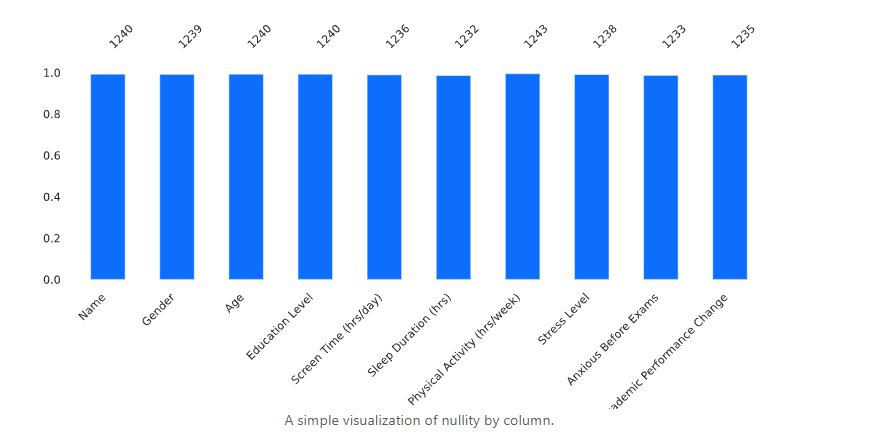

Dari data profiling didapatkan insight dari tiap variabel dalam dataset
1. Name :
*  terdapat 10 missing value
2. Gender
*  terdapat 11 missing value
3. Age
*  tipe data perlu diubah menjadi integer
*  terdapat 10 missing value
4. Education Level
*  terdapat 10 missing value
5. Screen Time
*  tipe data perlu diubah menjadi float
*  terdapat 14 missing value
6. Sleep Duration
*  tipe data perlu diubah menjadi float
*  terdapat 18 missing value
*  nilai terkecil berupa (-5) atau bernilai minus padahal durasi tidur seharusnya tidak boleh bernilai negatif
7. Physical Activity
*  tipe data perlu diubah menjadi float
*  terdapat 7 missing value
*  nilai terkecil berupa (-5) atau bernilai minus padahal durasi aktivitas fisik seharusnya tidak boleh bernilai negatif
8. Stress Level
*  terdapat 12 missing value
9. Anxious Before Exams
*  terdapat 17 missing value
10. Academic Performance Change
*   terdapat 15 missing value

Selain itu dari data juga ditemukan data yang terduplicate.


# Tipe Data

In [358]:
#Ubah nama kolom agar lebih mudah saat memanggil
df.rename(columns={
    'Name': 'name',
    'Gender': 'gender',
    'Age' : 'age',
    'Education Level' : 'education_level',
    'Screen Time (hrs/day)' : 'screen_time_hrs_day',
    'Sleep Duration (hrs)' : 'sleep_duration_hrs',
    'Physical Activity (hrs/week)' : 'physical_activity_hrs_week',
    'Stress Level' : 'stress_level',
    'Anxious Before Exams' : 'anxious_before_exams',
    'Academic Performance Change' : 'academic_performance_change'
}, inplace=True)


In [359]:
df.dtypes

,0
name,object
gender,object
age,object
education_level,object
screen_time_hrs_day,object
sleep_duration_hrs,float64
physical_activity_hrs_week,float64
stress_level,object
anxious_before_exams,object
academic_performance_change,object


Dari output tersebut dapat kita ketahui terdapat 2 jenis tipe data dalam df :
1.   **Object** : name, gender, age, education level, screen time, stress level, anxious before exams, dan academic performance change
2.  **Float** : sleep duration, physical activity

Di sini dapat ditemukan beberapa kejanggalan, di mana data yang seharusnya berupa numerik malah berupa object, yaitu screen time dan age.






#Analisis Univariat

##Kolom Kategorik

In [360]:
kolom_kategorik = ['name', 'gender', 'age', 'education_level', 'screen_time_hrs_day', 'stress_level', 'anxious_before_exams', 'academic_performance_change']

# Tampilkan frekuensinya
for col in kolom_kategorik:
    print(f'> Frekuensi \033[93m{col}\033[0m')
    print(f'  Terdapat {df[col].nunique(dropna = False)} data unik\n')
    display(df[col].value_counts(dropna = False).reset_index())
    print('\n')

> Frekuensi name
  Terdapat 31 data unik



,name,count
0,Shaurya,77
1,Kavya,68
2,Meera,66
3,Aadhya,66
4,Diya,64
5,Arjun,64
6,Anika,61
7,Krishna,61
8,Myra,60
9,Reyansh,60




> Frekuensi gender
  Terdapat 4 data unik



,gender,count
0,Female,592
1,Male,578
2,Other,69
3,NaN,11




> Frekuensi age
  Terdapat 17 data unik



,age,count
0,17.0,121
1,21.0,120
2,23.0,115
3,15.0,108
4,20.0,104
5,16.0,104
6,25.0,96
7,19.0,96
8,26.0,90
9,22.0,88




> Frekuensi education_level
  Terdapat 12 data unik



,education_level,count
0,MSc,172
1,MTech,172
2,MA,164
3,Class 10,116
4,Class 11,115
5,BSc,105
6,BTech,104
7,Class 9,100
8,BA,78
9,Class 8,58




> Frekuensi screen_time_hrs_day
  Terdapat 106 data unik



,screen_time_hrs_day,count
0,6.9,22
1,4.8,21
2,4.5,21
3,6.3,20
4,9.9,19
...,...,...
101,12.0,6
102,6.5,6
103,9.2,4
104,8.5,4




> Frekuensi stress_level
  Terdapat 4 data unik



,stress_level,count
0,Medium,625
1,Low,398
2,High,215
3,NaN,12




> Frekuensi anxious_before_exams
  Terdapat 3 data unik



,anxious_before_exams,count
0,Yes,634
1,No,599
2,NaN,17




> Frekuensi academic_performance_change
  Terdapat 4 data unik



,academic_performance_change,count
0,Same,486
1,Improved,377
2,Declined,372
3,NaN,15


Kejanggalan pada data yang bertipe object tellah ditemukan, pada kolom age terdapat responden yang mengisi age dengan tulisan huruf :

twenty (seharusnya 20)


begitu pula pada kolom screen time, terdapat yang mengisi dengan :

unknown (lebih baik kosong apabila tidak diketahui)

Maka perlu mengubahnya menjadi :

In [361]:
# Ubah string 'twenty' menjadi numerik pada kolom Age
df['age'] = df['age'].replace('twenty', 20)

# Konversi tipe datanya: pertama ke float, kemudian ke Int64
df['age'] = df['age'].astype(float)

In [362]:
# Ubah string 'unknown' pada kolom Screen Time (hrs/day) menjadi None (kosong)
df['screen_time_hrs_day'] = df['screen_time_hrs_day'].replace('unknown', np.nan)

# Konversi tipe datanya
df['screen_time_hrs_day'] = df['screen_time_hrs_day'].astype('float')

#Kolom Numerik

In [363]:
# Seleksi kolom dengan tipe numerik
kolom_numerik = df[['age', 'screen_time_hrs_day', 'sleep_duration_hrs', 'physical_activity_hrs_week']]

# Task C2 - Statistik Deskriptif Numerik
display(kolom_numerik.describe())

,age,screen_time_hrs_day,sleep_duration_hrs,physical_activity_hrs_week
count,1240.00,1235.00,1232.00,1243.00
mean,21.53,8.17,8.20,7.03
std,15.43,13.47,15.18,16.19
min,1.00,-5.00,-5.00,-5.00
25%,17.00,4.40,5.10,2.70
50%,20.00,6.90,6.50,5.10
75%,23.00,9.50,7.80,7.70
max,200.00,150.00,150.00,150.00


#Missing Value

## Hitung missing value

In [364]:
#cek missing value
missing_value = df.isna().sum()

display(missing_value)

,0
name,10
gender,11
age,10
education_level,10
screen_time_hrs_day,15
sleep_duration_hrs,18
physical_activity_hrs_week,7
stress_level,12
anxious_before_exams,17
academic_performance_change,15


Bisa kita lihat bahwa di setiap kolom terdapat missing value, baik di kolom yang memiliki tipe data kategorik maupun numerik. Sehingga diperlukan tahapan handling missing value untuk setiap tipe data.

##Handling Missing Value - Tipe Kategorik

In [365]:
# Tampilkan ukuran awal
df.shape

(1250, 10)

In [366]:
# Hapus baris yang Academic Performance Change kosong
df = df.dropna(subset=['academic_performance_change'])

Karena variabel dependen (Y) ang akan digunakan adalah academic performance change. Jadi untuk baris yang memiliki missing value pada kolom tersebut sebaiknya dihapus saja.

Selain itu, untuk kolom yang akan digunakan sebagai variabel dependen (X) yang juga merupakan data kategorik dapat diisi dengan unknown pada baris yang memiliki missing value.

In [367]:
#Cek dimensi df setelah hapus baris yang memiliki missing value pada acadmeic performmance change
df.shape

(1235, 10)

In [368]:
cat_cols = ['education_level', 'stress_level', 'anxious_before_exams']

#Isi missing value gender dengan unknown
df.loc[:, 'gender'] = df['gender'].fillna('Other')

#Isi missing value pada cat cols dengan unknown
df.loc[:, cat_cols] = df[cat_cols].fillna('Unknown')

#Handling MIssing Value - Tipe Numerik

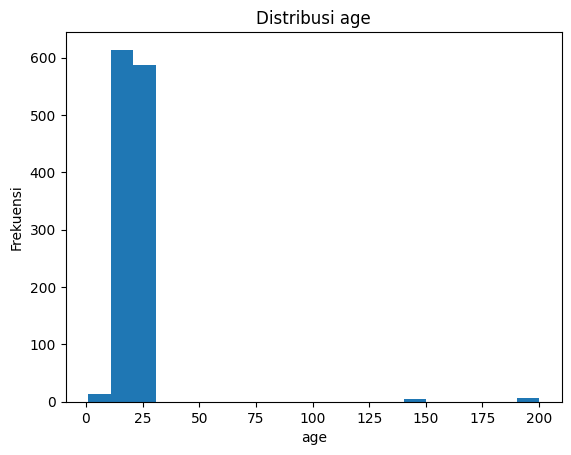

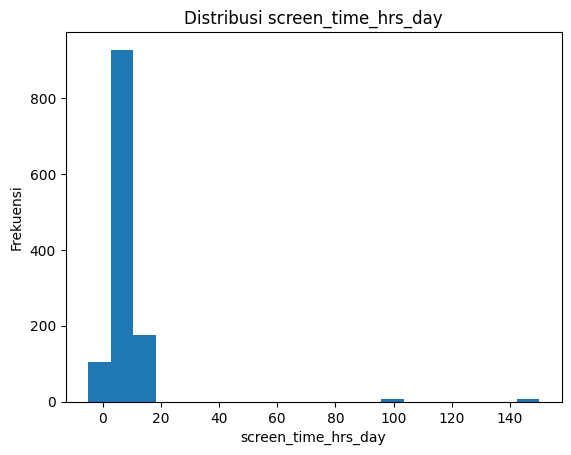

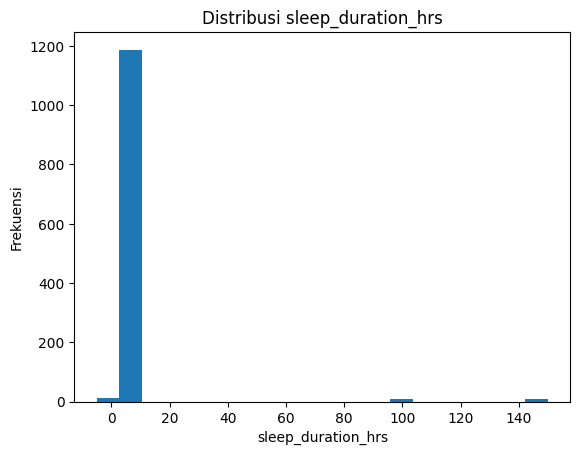

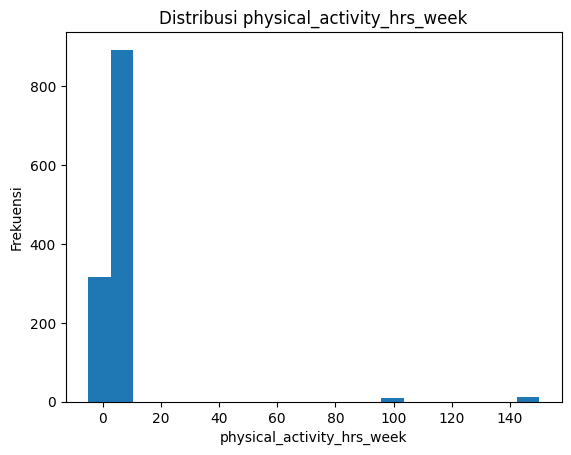

In [369]:
#cek plot tiap data numerik
import matplotlib.pyplot as plt

# Seleksi kolom dengan tipe numerik
kolom_numerik = df[['age', 'screen_time_hrs_day', 'sleep_duration_hrs', 'physical_activity_hrs_week']]

for col in kolom_numerik.columns:
    plt.figure()
    plt.hist(kolom_numerik[col], bins=20)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

Dari plot data yang bertipe numerik dapat kita lihat mengenai distribusi data. Dari keempat data yang bertipe numerik, yaitu age, screen time, sleep duration, and physical actvity memiliki distribusi data yang menceng atau skewed.

Selain itu, keempat data memiliki outlier atau pencilan. Hal ini terlihat dari adanya data yang berada jauh dari disribusi data yang terpusat di bagian kiri.

Oleh karena itu, untuk handling outlier dari keempat kolom ini dilakukan dengan imputasi median atau mengisi missing value dengan nilai median dari tiap kolom. Hal ini dilakukan karena data tidak berdistribusi normal dan adanya outlier ekstrem.

In [370]:
# Isikan setiap missing value pada kolom numerik dengan median datanya
for col in kolom_numerik.columns:
    median_data = df[col].median()
    df.loc[:, col] = df[col].fillna(median_data)

In [371]:
# Periksa missing value
display(df.isna().sum())

,0
name,10
gender,0
age,0
education_level,0
screen_time_hrs_day,0
sleep_duration_hrs,0
physical_activity_hrs_week,0
stress_level,0
anxious_before_exams,0
academic_performance_change,0


Setelah dilakukan handling missing value, dapat diketahui bahwa seluruh kolom pada dataset, kecuali kolom name, sudah tidak memiliki nilai yang hilang.

Pada kolom name tidak dilakukan penanganan missing value karena variabel tersebut tidak diperlukan dalam proses analisis. Selain itu, variabel name hanya berfungsi sebagai penanda individu dan tidak mengandung makna numerik maupun kategorik yang dapat memengaruhi performa akademik.

#Duplicate Data

In [372]:
print(f'Jumlah data saat ini : {df.shape}')
print(f'Jumlah data duplikat : {df.duplicated(keep = False).sum()}')

Jumlah data saat ini : (1235, 10)
Jumlah data duplikat : 342


Dari keseluruhan data saat ni yang memiliki 1235 baris dan 10 kolom terdapat jumlah data duplikat sejumlah 342. Sehingga perlu dihapus.

In [373]:
# Hapus duplikasi data
df = df.drop_duplicates()
print(f'Jumlah data saat ini : {df.shape}')

Jumlah data saat ini : (1056, 10)


Setelah menghapus baris yang duplikat, jumlah data adalah 1056.

#Outlier

## Menggunakan box plot untuk deterksi outlier

In [374]:
import plotly.express as px

def box_plot(series, column_name, color):
    # Buat horizontal box plot
    fig = px.box(
        series,
        orientation = 'h',
        color_discrete_sequence  = [color]
    )

    # Update layout and display the plot
    fig.update_layout(
        title = f'<b>Box Plot {column_name}</b>',
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        xaxis = dict(
            title = column_name,
            showgrid = False,
            showline = True,
            showticklabels = True,
            zeroline = False,
        )
    )

    fig.show()

In [375]:
for col in kolom_numerik:
    box_plot(df[col], col, '#B07AA1')

Dari visualisasi box plot dapat dilihat outlier dari variabel yang memiliki tipe data numerik. Dari variabel age, screen time, sleep hours, dan physical activity memiliki outlier dan perlu untuk dilakukan penanganan.

Untuk handling outlier digunakan metode winsorizing. Metode ini menangani outlier dengan membatasi nilai ekstrem ke batas tertentu tanpa menghapus data, sehingga pengaruh outlier berkurang tapi informasi tetap terjaga. Pada preprocessing ini, outlier atau nilai yang melewati batas bawah dan batas atas diganti dengan nilai batas atas dan batas bawah sehingga jumlah pengamatan tetap dapat dipertahankan, akan tetapi distribusi menjadi lebih stabil karena pengaruh nilai ekstrem dikurangi.

##Handling Outlier menggunakan metode Winsorizing

In [376]:
# Fungsi untuk teknik winsorizing
def teknik_winsorizing(series):
    # Hitung Q1, Q3, dan IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Hitung lower dan upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Jika lower bound negatif maka ubah menjadi 0
    if(lower_bound < 0):
      lower_bound = 0

    # Winsorizing: clip nilai ke batas bawah & atas
    series = series.astype(pd.Float64Dtype())
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)

    return (winsorized_series)

In [377]:
for col in kolom_numerik:
    df[col] = teknik_winsorizing(df[col])
    box_plot(df[col], col, '#B07AA1')

Pada box plot setelah dilakukan metode winsorizing untuk penanganan outliers sudah tidak terdapat outlier pada variabel yang bertipe data numerik dari dataset df.

#Distribusi

In [378]:
# Your Code
import plotly.express as px

for col in kolom_numerik:
    fig = px.histogram(
        df,
        x = col,
        nbins = 25,
        color_discrete_sequence = ['#B07AA1'],
        marginal = "box",
        hover_data = df.columns
    )

    fig.update_yaxes(
        showgrid = False,
        showticklabels=False,
        title =''
    )

    fig.update_layout(
        title={
            'text' : f'Distribusi <b><span style="color:#B07AA1"></span> {col}</b>',
            'y':0.92,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        plot_bgcolor = 'rgba(0,0,0,0)',
        bargap = 0.01,
        title_font = dict(size = 25)
    )

    fig.show()

Selain itu, dari visualisasi distribusi dapat dilihat mnegenai distribusi tiap variabel yang bertipe data numerik. Pada data setelah penanganan outliers sudah tidak lagi terlihat data yang memiliki persebaran jauh dari mean dan mediannya. Hal ini dikarenakan outlier telah ditangani dengan mengubah nilainya ke batas atas dan bawah untuk setiap variabel yang ada.

#Analisis Multivariate

## Korelasi

In [379]:
# Task D1 - Hitung korelasi
data_corr = df.select_dtypes(include=['number']).corr()

# Tampilkan hasilnya
display(data_corr)

,age,screen_time_hrs_day,sleep_duration_hrs,physical_activity_hrs_week
age,1.00,0.01,0.02,-0.00
screen_time_hrs_day,0.01,1.00,-0.00,0.02
sleep_duration_hrs,0.02,-0.00,1.00,-0.02
physical_activity_hrs_week,-0.00,0.02,-0.02,1.00


In [380]:
import plotly.express as px

# Buat Grafiknya
fig = px.imshow(
    data_corr,
    color_continuous_scale='blues',
    title = '<b>Korelasi Kolom Numerik Data Student</b><br>',
    text_auto = True
)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(
    title = dict(
        x=0.5,
        y=0.9,
        xanchor='center',
        yanchor='top'
    ),
    width = 1000,
    height = 800
)

#Menampilkan heatmap
fig.show()

Dari penyajian tabel korelasi data bertipe numerik dari dataset. Dapat dilihat bahwa data berkorelasi antar satu variabel dengan variabel lainnya meskipun nilainya sangat kecil (kurang berhubungan kuat) dan ada juga yang memiliki korelasi negatif yang menandakan semakin bertambahnya variabel satu, variabel lainnya yang berkorelasi negatif dengannya akan berkurang.

# Statistik tiap Kategori Academic Performance Change

In [381]:
df.groupby(['academic_performance_change']).agg(
    total_data = ('name', 'count'),
    min_age = ('age', 'min'),
    median_age = ('age', 'median'),
    max_age = ('age', 'max'),
    min_screen_time = ('screen_time_hrs_day', 'min'),
    median_screen_time = ('screen_time_hrs_day', 'median'),
    max_screen_time = ('screen_time_hrs_day', 'max'),
    min_sleep_duration = ('sleep_duration_hrs', 'min'),
    median_sleep_duration = ('sleep_duration_hrs', 'median'),
    max_sleep_duration = ('sleep_duration_hrs', 'max')
)

,total_data,min_age,median_age,max_age,min_screen_time,median_screen_time,max_screen_time,min_sleep_duration,median_sleep_duration,max_sleep_duration
academic_performance_change,,,,,,,,,,
Declined,310,8.00,20.00,32.00,0.00,6.90,17.00,1.30,6.35,11.70
Improved,317,8.00,21.00,32.00,0.00,7.00,17.00,1.30,6.50,11.70
Same,419,8.00,20.00,32.00,0.00,6.90,17.00,1.30,6.60,11.70


#Data Preprocessing

##Feature Selection

In [382]:
# Copy DataFrame
data_preprocessing = df

# Hapus kolom name
data_preprocessing = df.drop(columns=['name'])

# Tampilkan hasilnya
data_preprocessing.head()

,gender,age,education_level,screen_time_hrs_day,sleep_duration_hrs,physical_activity_hrs_week,stress_level,anxious_before_exams,academic_performance_change
0,Male,15.00,Class 8,7.10,8.90,9.30,Medium,No,Same
1,Female,25.00,MSc,3.30,1.30,0.20,Medium,No,Same
2,Male,20.00,BTech,9.50,11.70,6.20,Medium,No,Same
3,Male,20.00,BA,10.80,5.60,5.50,High,Yes,Same
4,Female,17.00,Class 11,2.80,5.40,3.10,Medium,Yes,Same


Feature selection dilakukan untuk memilih fitur yang relevan dan membuang fitur yang tidak berkontribusi besar terhadap target (Y). Pada tahap ini, dilakukan fitur selection dengan menghapus variabel name dari dataset untuk dilakukan analisis. Hal ini dikarenakan nama tidak memiliki fungsi tertentu dalam analisis performa akademik siswa.

##Encoding

Proses encoding dilakukan untuk mnegubah data bertipe kategorik menjadi bertipe numerik. Hal ini dilakukan karena komputer tidak mampu mengolah data berbentuk huruf dalam analisis sehingga perlu dilakukan tahap encoding .

In [383]:
# Definisikan ulang kolom kategorik dan kolom numerik
kolom_kategorik = data_preprocessing.select_dtypes(include=['object']).columns
kolom_numerik = data_preprocessing.select_dtypes(include=['number']).columns

In [384]:
kolom_kategorik

Index(['gender', 'education_level', 'stress_level', 'anxious_before_exams',
       'academic_performance_change'],
      dtype='object')

In [385]:
# Import library yang dibutuhkan
from sklearn.preprocessing import OrdinalEncoder

# Panggil object Ordinal Encoder
ord_enc = OrdinalEncoder()

# Terapkan
data_preprocessing[kolom_kategorik] = ord_enc.fit_transform(data_preprocessing[kolom_kategorik])

# Tampilkan hasilnya
display(data_preprocessing)

,gender,age,education_level,screen_time_hrs_day,sleep_duration_hrs,physical_activity_hrs_week,stress_level,anxious_before_exams,academic_performance_change
0,1.00,15.00,6.00,7.10,8.90,9.30,2.00,0.00,2.00
1,0.00,25.00,9.00,3.30,1.30,0.20,2.00,0.00,2.00
2,1.00,20.00,2.00,9.50,11.70,6.20,2.00,0.00,2.00
3,1.00,20.00,0.00,10.80,5.60,5.50,0.00,2.00,2.00
4,0.00,17.00,4.00,2.80,5.40,3.10,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...
1241,2.00,18.00,5.00,10.90,5.00,4.80,1.00,2.00,2.00
1242,0.00,22.00,9.00,5.70,1.30,3.40,2.00,0.00,2.00
1243,1.00,15.00,7.00,4.80,8.70,3.00,1.00,1.00,2.00
1247,1.00,22.00,11.00,5.50,4.40,0.00,2.00,0.00,0.00


In [387]:
for col, categories in zip(kolom_kategorik, ord_enc.categories_):
    print(f"Mapping untuk \033[93m{col}\033[0m:\n")
    for i, cat in enumerate(categories):
        print(f"  {cat} → {i}")
    print()

Mapping untuk gender:

  Female → 0
  Male → 1
  Other → 2

Mapping untuk education_level:

  BA → 0
  BSc → 1
  BTech → 2
  Class 10 → 3
  Class 11 → 4
  Class 12 → 5
  Class 8 → 6
  Class 9 → 7
  MA → 8
  MSc → 9
  MTech → 10
  Unknown → 11

Mapping untuk stress_level:

  High → 0
  Low → 1
  Medium → 2
  Unknown → 3

Mapping untuk anxious_before_exams:

  No → 0
  Unknown → 1
  Yes → 2

Mapping untuk academic_performance_change:

  Declined → 0
  Improved → 1
  Same → 2



## Splitting Data

Untuk splitting data, digunakan 80% dari data untuk training, dan 20% diantaranya untuk testing.

In [395]:
# Import library yang digunakan
from sklearn.model_selection import train_test_split

# Variabel X untuk fitur dan variabel y untuk target
X = data_preprocessing.drop(columns=['academic_performance_change'])
y = data_preprocessing['academic_performance_change']

# Proses splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [396]:
# Tampilkan frekuensi kemunculan target
display(y_train.value_counts(normalize=False))

,count
academic_performance_change,
2.00,339
1.00,256
0.00,249



*   Declined : 0
*   Improved : 1
*   Same : 2

##Imbalance

Untuk menyeimbangkan jumlah data tiap kelas, yaitu untuk kelas declined, improved, dan same, dilakukan imbalance untuk mencegah model menjadi bias ke kelas mayoritas.

Untuk mengatasi imbalance data digunakan SMOTE atau synthetic minority over-sampling technique. Teknik ini dapat mengatasi ketidakseimbangan jumlah data dengna membuat data sintesis pada kelas minoritas.

In [400]:
# Import library imblearn
from imblearn.over_sampling import SMOTE

# Buat object SMOTE
smote = SMOTE(random_state=42)

# Terapkan pada X_train dan X_test dan buat variabel baru hasil oversampling
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
X_test_resample, y_test_resample = smote.fit_resample(X_test, y_test)

In [401]:
# Tampilkan frekuensi kemunculan target
display(y_train_resample.value_counts(normalize=False))

,count
academic_performance_change,
1.00,339
2.00,339
0.00,339


#Modelling

In [402]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('smote', SMOTE()),
    ('model',DecisionTreeClassifier())
])

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': [None, 5, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5],
    'model__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1_macro',
    n_jobs = -1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'smote__k_neighbors': 7}
Best CV Score: 0.3872576439981198


Dari seluruh kombinasi parameter, kombinasi yang menghasilkan performa terbaik :

```
# Best Params: {'model__class_weight': 'balanced', 'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'smote__k_neighbors': 7}
Best CV Score: 0.3872576439981198
```
Best CV Score yang mmeiliki angka 0.387... mengindikasikan bahwa model kurang cukup baik dalam mempelajari pola yang ada pada data performa belajar.







In [403]:
# Import library yang dibutuhkan
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Masukan parameter yang telah di-tuning
model_dtc = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 30,
    min_samples_leaf = 1,
    min_samples_split = 5,
    splitter = 'best'
)

# Definsikan pipeline baru
new_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('smote', SMOTE()),
    ('model', model_dtc)
])

# Terapkan pada CV
cv = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 42
)

scores = cross_val_score(new_pipe, X, y, cv=cv, scoring = 'accuracy')

print(f'Scores : {scores}')
print(f'Mean   : {scores.mean()}')
print(f'Std    : {scores.std()}')

Scores : [0.40566038 0.40758294 0.33175355 0.31753555 0.36492891]
Mean   : 0.3654922650451578
Std    : 0.03694202750957284


Nilai akurasi pada cross validation didapatkan skor terbaik senilai 0.40758294 dari 5 kali uji. Variasi performa antar uji relatif kecil yang menunjukkan bahwa model cukup stabil meskipun tingkat akurasinya masih relatif rendah.

In [404]:
model_dtc.fit(X_train_resample, y_train_resample)

# Predict test set labels
y_pred = model_dtc.predict(X_test)

In [405]:
from sklearn import metrics

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y_pred, y_test)

# Tampilkan hasilnya
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.30      0.32      0.31        60
         1.0       0.34      0.32      0.33        68
         2.0       0.40      0.40      0.40        84

    accuracy                           0.35       212
   macro avg       0.35      0.35      0.35       212
weighted avg       0.35      0.35      0.35       212



Hasil evaluasi menunjukkan bahwa model menghasilkan nilai F1-score berkisar antara 0,31 hingga 0,40 pada masing-masing kelas, dengan akurasi keseluruhan sebesar 35%.

Berdasarkan classification report, model menunjukkan performa terbaik pada kelas 2.0, yaitu pada academic performace kategori same dengan nilai F1-score sebesar 0,40, sementara performa pada kelas lainnya masih relatif rendah, yang mengindikasikan bahwa model belum mampu membedakan kelas secara optimal.

In [406]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Plot dengan Plotly
fig = px.imshow(
    confusion_matrix(y_test, y_pred),
    text_auto = True,
    color_continuous_scale = 'Blues',
    title = "<b>Confusion Matrix Model Decision Tree</b>",
)

# Ubah tampilan xticks dan yticks
fig.update_xaxes(
    tickmode = "array",
    tickvals = [0, 1, 2],
    ticktext = ['Declined', 'Improved', 'Same']
)

fig.update_yaxes(
    tickmode = "array",
    tickvals = [0, 1, 2],
    ticktext = ['Declined', 'Improved', 'Same'],
    tickangle = -90
)

# Hapus legend / colorbar
fig.update_layout(coloraxis_showscale = False)

# Judul dan label + ukuran figure
fig.update_layout(
    title = dict(
        x = 0.5,
        y = 0.9,
        xanchor = 'center',
        yanchor = 'top'
    ),
    xaxis_title = "<b>Prediksi</b>",
    yaxis_title = "<b>Nilai Sebenarnya</b>",
    width = 700,
    height = 700
)

# Tampilkan grafik
fig.show()

Berdasarkan confusion matrix yang dihasilkan, model Decision Tree menunjukkan kemampuan klasifikasi yang berbeda pada masing-masing kelas. Prediksi yang benar paling banyak terdapat pada kelas same, dengan 34 data berhasil diklasifikasikan secara tepat, menunjukkan bahwa model relatif lebih mampu mengenali mahasiswa dengan performa akademik yang stabil. Sementara itu, pada kelas improved, hanya 22 data yang diprediksi dengan benar, dan pada kelas declined jumlah prediksi benar lebih rendah, yaitu 19 data. Hal ini mengindikasikan bahwa model masih mengalami kesulitan dalam mengidentifikasi perubahan performa akademik yang bersifat peningkatan maupun penurunan.

Selain itu, terlihat adanya kesalahan klasifikasi yang cukup tinggi antar kelas, terutama antara kelas declined dan same, di mana 27 data declined salah diprediksi sebagai same. Pada kelas improved, kesalahan prediksi juga cukup besar, dengan 23 data salah diklasifikasikan sebagai same. Pola ini menunjukkan bahwa karakteristik fitur yang digunakan dalam model belum mampu membedakan secara jelas antara mahasiswa yang mengalami perubahan performa akademik dengan mahasiswa yang performanya relatif stabil. Secara keseluruhan, confusion matrix ini sejalan dengan hasil evaluasi sebelumnya yang menunjukkan nilai akurasi dan F1-score yang masih tergolong sedang, sehingga dapat disimpulkan bahwa meskipun model telah mampu menangkap pola dasar dalam data, masih diperlukan pengembangan lebih lanjut untuk meningkatkan kemampuan model dalam membedakan setiap kelas secara lebih akurat.

**KESIMPULAN** :

Berdasarkan hasil pemodelan menggunakan  Decision Tree dengan penerapan SMOTE untuk menangani ketidakseimbangan kelas, dapat disimpulkan bahwa model telah mampu mempelajari pola dasar dari data performa akademik mahasiswa, akan tetapi performanya masih tergolong sedang. Hal ini ditunjukkan oleh nilai akurasi dan F1-score yang berada pada kisaran 35%, baik pada evaluasi menggunakan cross validation maupun pada data uji.

Hasil classification report menunjukkan bahwa model memiliki kinerja terbaik dalam memprediksi kelas same, sedangkan performa pada kelas declined dan improved masih relatif rendah. Confusion matrix memperlihatkan bahwa masih terjadi kesalahan klasifikasi yang cukup tinggi antar kelas, terutama antara kelas declined, improved, dan same, yang mengindikasikan adanya tumpang tindih karakteristik antar kelas pada fitur yang digunakan. Meskipun teknik SMOTE berhasil membantu menyeimbangkan distribusi kelas, model Decision Tree masih kesulitan dalam membedakan perubahan performa akademik secara spesifik.




